<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Logistic_Regression_Multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from time import time
import math,random
from numpy.random import default_rng
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
#Step 1: Prepare data
iris = datasets.load_iris()
X = iris.data[:, 2:] 
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
def train_test(X,Y,size):
  rng = default_rng()
  SizeTrain=int((size*X.shape[0]))
 
  random_np=rng.choice(X.shape[0], size=SizeTrain, replace=False)
  X_test=X[random_np,:]
  y_test=Y[random_np]
  Y_train=np.delete(Y, random_np,axis=0)
  X_train=np.delete(X, random_np,axis=0)
  return X_train,X_test,Y_train,y_test


X_train, X_test, Y_train, Y_test = train_test(X, y,0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1) 

intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)


In [6]:
k = len(set(y)) 

m = X_train.shape[0]
n = X_train.shape[1]
print ("m = {0} , n = {1}".format(m,n))
Y_train_encoded = np.zeros((m, k))

for each_class in range(k):
    cond = Y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

m = 105 , n = 3


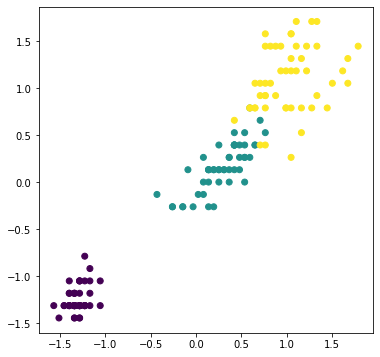

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [ ]:
class LogisticRegression():
  def __init__(self, alpha = 0.0001,max_iter = 20000,loss_old = 10000,
               tol = 0.0001,method='batch',sizing=20):
    self.alpha=alpha
    self.max_iter=max_iter
    self.loss_old= loss_old
    self.tol=tol
    self.method=method
    self.sizing=sizing
  def gradient(self,X, Y,W):
    m = X.shape[0]
    h = self.h_theta(X, W)
    cost = - np.sum(Y * np.log(h)) / m
    error = h - Y
    grad = self.softmax_grad(X, error)
    return cost, grad
  def softmax(self,theta_t_x):
    return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)
  def softmax_grad(self,X, error):
    return  X.T @ error
  def h_theta(self,X, W):
    return self.softmax(X @ W)
  def plot(self):
    plt.plot(np.arange(len(self.loss)),self.loss,label= ' Train losses')
    plt.title('Losses')
    plt.xlabel('epoch')
    plt.ylabel('losses')
  
  
  def mini_batch(self,X,Y):
      rng = default_rng()     # function random not replace number
      size_u=int(X.shape[0] * self.sizing/100)
      random_np=rng.choice(X.shape[0], size=size_u, replace=False)
      #random_np= np.random.randint(X_train.shape[0],size=sizing)
      X=X[random_np,:]
      Y=Y[random_np]
      return X,Y

  def sto(self,X,Y):
      no_random=random.randrange(X.shape[0])
      X=X[no_random,:]
      
      mx=np.shape(X)[0]
      
      X=X.reshape(1,mx)
      Y=Y[no_random:no_random+1]
      return X,Y  


  def logistic_regression_GD(self,X_t, Y_t, k, n):
    W = np.random.rand(n, k)
    l_rate = 0.01
    start = time()
    self.loss=[]
    if self.method != 'mini_batch' and self.method != 'sto' and self.method != 'batch':
      raise ValueError('Out of method')
      
    for i in range(self.max_iter):
      if self.method == 'mini_batch':
        X,Y=self.mini_batch(X_t,Y_t)
      if self.method == 'sto':
        X,Y=self.sto(X_t,Y_t)
      if self.method == 'batch':
        X,Y=X_t,Y_t
      cost, grad =  self.gradient(X, Y, W)
      if i % 500 == 0:
        print(f"Cost at iteration {i}", cost)
      W = W - l_rate * grad
      self.loss.append(cost)
    time_taken = time() - start
    print('method : {0} , Times : {1} s'.format(self.method,time_taken))
    yhat = np.argmax(self.h_theta(X_test, W), axis=1)
    print("=========Classification report=======")
    print("Report: ", classification_report(Y_test, yhat))
    self.plot()
    return W, i
    

  

Cost at iteration 0 1.1093757011284384
Cost at iteration 500 0.06799754471275556
Cost at iteration 1000 0.059706010338172494
Cost at iteration 1500 0.05693002210988985
Cost at iteration 2000 0.05562662134763629
Cost at iteration 2500 0.05490941389821607
Cost at iteration 3000 0.05447462695658943
Cost at iteration 3500 0.054192515902386516
Cost at iteration 4000 0.05399968073758808
Cost at iteration 4500 0.053862164553111894
Cost at iteration 5000 0.05376051993957242
Cost at iteration 5500 0.05368302116723027
Cost at iteration 6000 0.053622301418731526
Cost at iteration 6500 0.05357357227945179
Cost at iteration 7000 0.053533629769978414
Cost at iteration 7500 0.05350027502710726
Cost at iteration 8000 0.053471964353136406
Cost at iteration 8500 0.0534475913322208
Cost at iteration 9000 0.053426347608440054
Cost at iteration 9500 0.053407631893172706
Cost at iteration 10000 0.05339098929306008
Cost at iteration 10500 0.05337607012190347
Cost at iteration 11000 0.05336260147771578
Cost a

(array([[-2.81196989,  7.1571693 , -3.4549431 ],
        [-7.79990034,  1.40170294,  7.71651237],
        [-7.83825563, -1.39945543, 10.51414946]]), 19999)

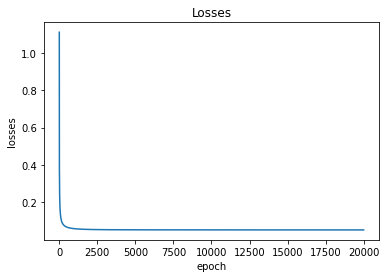

In [ ]:
model=LogisticRegression(method='batch')
model.logistic_regression_GD(X_train, Y_train_encoded, k, X_train.shape[1])

Cost at iteration 0 1.0964371201366008
Cost at iteration 500 0.08572974794766368
Cost at iteration 1000 0.0831191711883846
Cost at iteration 1500 0.0394920968826066
Cost at iteration 2000 0.09887987198834343
Cost at iteration 2500 0.08341907175321207
Cost at iteration 3000 0.12879119547972978
Cost at iteration 3500 0.017246292248693378
Cost at iteration 4000 0.04307485299358744
Cost at iteration 4500 0.09455661108745421
Cost at iteration 5000 0.111637746151077
Cost at iteration 5500 0.04622303640789552
Cost at iteration 6000 0.12136913838290576
Cost at iteration 6500 0.1264280327583577
Cost at iteration 7000 0.014848541756762005
Cost at iteration 7500 0.0456022211508612
Cost at iteration 8000 0.010950427043263485
Cost at iteration 8500 0.1196456542825017
Cost at iteration 9000 0.03574536278511996
Cost at iteration 9500 0.025575040447700346
Cost at iteration 10000 0.021931672540710104
Cost at iteration 10500 0.0896111971452915
Cost at iteration 11000 0.024609896670940733
Cost at iterati

(array([[-1.37481275,  6.35888263, -3.59405256],
        [-6.55153392,  1.12813574,  6.71951992],
        [-6.42672634, -2.03517608,  9.28682882]]), 19999)

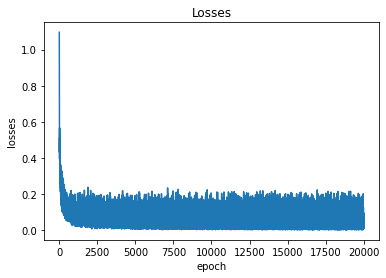

In [ ]:
model=LogisticRegression(method='mini_batch')
model.logistic_regression_GD(X_train, Y_train_encoded, k, X_train.shape[1])

Cost at iteration 0 1.5266012068221364
Cost at iteration 500 0.22319539426848037
Cost at iteration 1000 0.4313613378146686
Cost at iteration 1500 0.20642242818872258
Cost at iteration 2000 0.05858937975513677
Cost at iteration 2500 0.06606801497844968
Cost at iteration 3000 0.33709659645522577
Cost at iteration 3500 0.051000049919370107
Cost at iteration 4000 0.04286076526200763
Cost at iteration 4500 0.04138326144106186
Cost at iteration 5000 0.008228782983593539
Cost at iteration 5500 0.017067480526067946
Cost at iteration 6000 0.1648187559339534
Cost at iteration 6500 0.03201888548521886
Cost at iteration 7000 0.21024356019754364
Cost at iteration 7500 0.10985649406096795
Cost at iteration 8000 0.08159237231437833
Cost at iteration 8500 0.3546475352758604
Cost at iteration 9000 0.019240346227598206
Cost at iteration 9500 0.3309256504461279
Cost at iteration 10000 0.028027910215416747
Cost at iteration 10500 0.2642891272899591
Cost at iteration 11000 0.4768720592729133
Cost at iterat

(array([[-0.42627884,  3.37876065, -1.15711018],
        [-3.05571379,  1.17623   ,  3.85808936],
        [-2.6348961 , -0.47346757,  4.71961251]]), 19999)

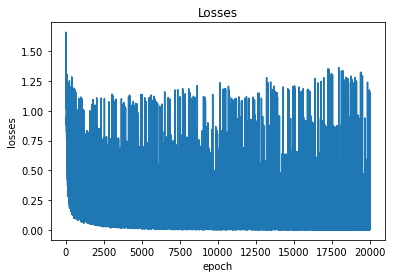

In [ ]:
model=LogisticRegression(method='sto')
model.logistic_regression_GD(X_train, Y_train_encoded, k, X_train.shape[1])

# ***Result :***

1.   method : batch , Times : 1.1282696723937988 s

    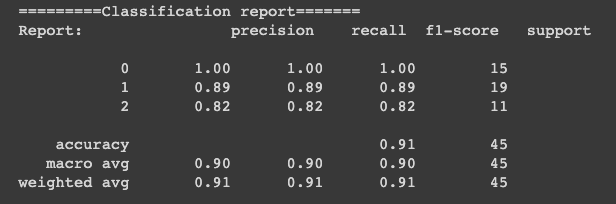

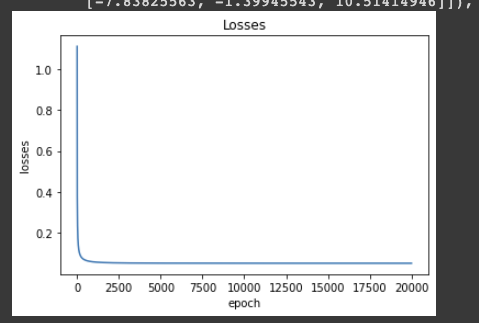
      











2. method : mini_batch , Times : 2.957003116607666 s



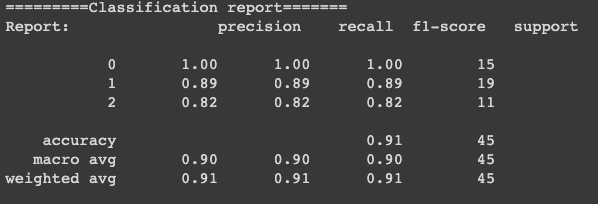
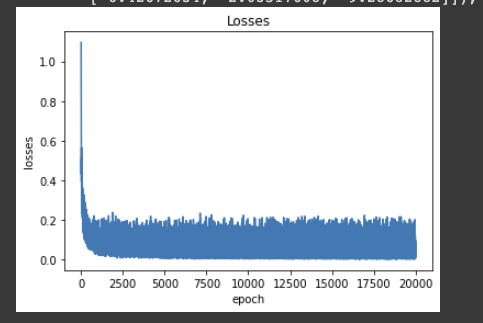

3. method : sto , Times : 0.7404096126556396 s

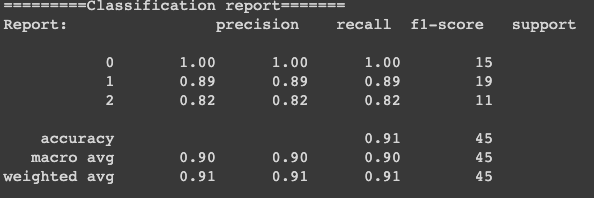

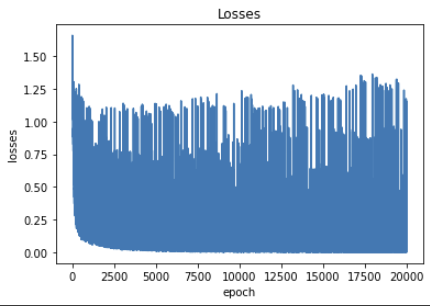

**# Discussion** 

1. In point of Time for Training 20000 iteration.

  STO <  Batch  <  Mini Batch

  0.740 s < 1.123 s < 2.957 s

  In this point STO fastest because this Algorithm random just one data for training in each iteration then make lowest load for calculation.
   How about Batch and Mini Batch. This algorithm should lower than Mini Batch but this time we have data set just m = 105 , n = 3. then way to separate or random for thake some group of data for calculate in each iteration that don't help to decrease time for calculate. But in this case Mini Batch will have to make load for random group of data in every iteration.


2. In point of Classification report.
  In every Algorithm  will get same result that is 
  
                 precision   recall   f1-score     support
           0       1.00      1.00      1.00        15
           1       0.89      0.89      0.89        19
           2       0.82      0.82      0.82       
           
           accuracy                           0.91        45
          macro avg       0.90      0.90      0.90        45
          weighted avg       0.91      0.91      0.91        45

 this reslt maen ever Algorithm can same result.

 3. In point of loss chart.

 In loss chart of Batch line it smoothes.  Because this Algorithm take all of train set to calculation in every iteration that make continuation. 
How about Mini Batch loss chart we will see about line graph is oscillating.
Becase this Algorithm  thake some group of train data set that impact to calculat continuation. For STO you will see a lot of oscillating in line graph because this Algorithm thake just one data from train set to calculat in each iteration. that will impact a lot to continuation of calculation.
 